# Actividad
Ejercicio: Implementación de CNN para Clasificación de Imágenes desde una Base de Datos Descargada.



---
Por: Ángela Daniela Córdoba Álvarez


---




In [1]:
# Importar librerías
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [2]:
import os
from google.colab import files

# Crear el directorio .kaggle y subir el archivo kaggle.json
os.makedirs('/root/.kaggle/', exist_ok=True)
files.upload()  # Aquí subirás el archivo kaggle.json

# Mover kaggle.json al directorio apropiado
!mv kaggle.json /root/.kaggle/

# Dar permisos de lectura al archivo kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Saving dataset-master.zip to dataset-master.zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Descargar el dataset usando Kaggle API
!kaggle datasets download -d paultimothymooney/blood-cells

# Descomprimir el dataset
!unzip blood-cells.zip -d blood_cells

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: blood_cells/dataset2-master/dataset2-master/images/TRAIN

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Directorios de entrenamiento y validación
train_dir = os.path.join('blood_cells/dataset2-master/dataset2-master/images/TRAIN')
validation_dir = os.path.join('blood_cells/dataset2-master/dataset2-master/images/TEST')

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


Construir la CNN:

In [5]:
from tensorflow.keras import layers, models

# Definir la arquitectura de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 clases en el dataset
])

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.2477 - loss: 1.4960 - val_accuracy: 0.2431 - val_loss: 1.3874
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2293 - loss: 1.3883

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.2295 - loss: 1.3881 - val_accuracy: 0.2413 - val_loss: 1.3943
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.2330 - loss: 1.3931 - val_accuracy: 0.2481 - val_loss: 1.3860
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.1831 - loss: 1.3881 - val_accuracy: 0.2593 - val_loss: 1.3863
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.2055 - loss: 1.3847 - val_accuracy: 0.2475 - val_loss: 1.3873
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3160 - loss: 1.3846 - val_accuracy: 0.2661 - val_loss: 1.3865
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.2217 - loss: 1.3876 - val_accuracy: 0.2475 - val_loss: 1.3871
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2337 - loss: 1.3871 - val_accuracy: 0.2300 - val_loss: 1.3867
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2398 - loss: 1.3864 - val_accuracy: 0.2463 - val_loss: 1.3864
Epo

<Axes: >

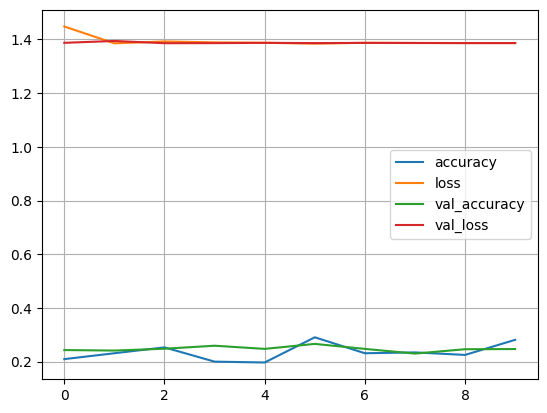

In [6]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [7]:
# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator, steps=50)
print(f'Pérdida: {loss}')
print(f'Precisión: {accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - accuracy: 0.2719 - loss: 1.3857
Pérdida: 1.3862916231155396
Precisión: 0.25437501072883606


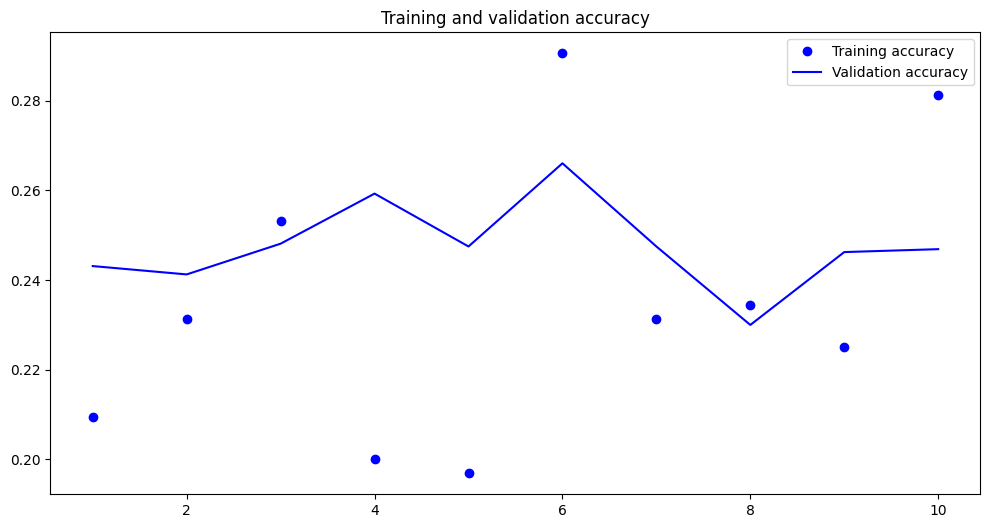

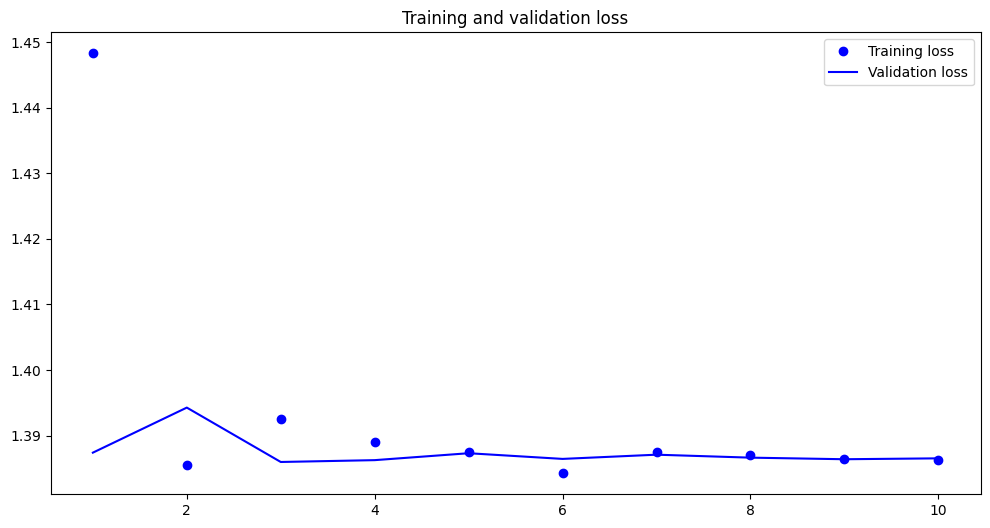

In [8]:
import matplotlib.pyplot as plt

# Visualizar el rendimiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Gráfico de precisión
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
# Gráfico de pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de datos
train_dir = 'blood_cells/dataset2-master/dataset2-master/images/TRAIN'
test_dir = 'blood_cells/dataset2-master/dataset2-master/images/TEST'

# Crear generador de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Crear generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Obtener imágenes y etiquetas de prueba
test_images, test_labels = [], []
for _ in range(len(test_generator)):
    img, lbl = next(test_generator)
    test_images.append(img[0])
    test_labels.append(lbl[0])

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Obtener imágenes y etiquetas de entrenamiento
train_images, train_labels = [], []
for _ in range(len(train_generator)):
    img, lbl = next(train_generator)
    train_images.append(img[0])
    train_labels.append(lbl[0])

train_images = np.array(train_images)
train_labels = np.array(train_labels)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definir el modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definir el modelo CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150,150, 3)), # Input shape adjusted to match the image size
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)), # Increased neurons in the first dense layer
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.25),
    Dense(4, activation='softmax')
])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,904,964 (26.34 MB)

 Trainable params: 6,904,964 (26.34 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

* Entrenar el modelo con *train_images* y *train_labels*:

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2410 - loss: 1.7259
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2420 - loss: 1.6913
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2596 - loss: 1.6626
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2570 - loss: 1.6376
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3092 - loss: 1.6106
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2631 - loss: 1.5966
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2892 - loss: 1.5773
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2657 - loss: 1.5643
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2573 - loss: 1.5487
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2692 - loss: 1.5361
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.3214 - loss: 1.5232
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2567 - lo

<Axes: >

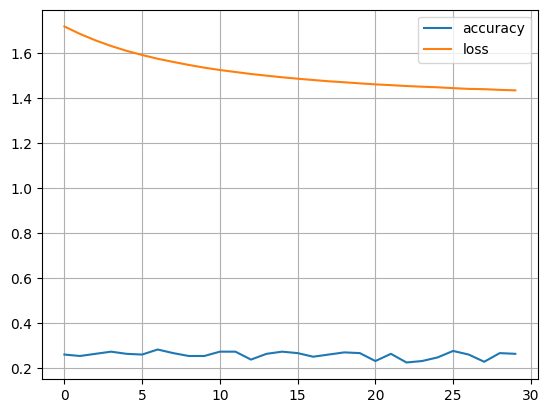

In [16]:
# Entrenar el modelo
history1 = model.fit(train_images,train_labels, epochs=30, batch_size=32)
# Graficar el historial de entrenamiento:
pd.DataFrame(history1.history).plot(grid=True)

* Predecir y visualizar imágenes

Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Classification:
 [[0.26112294]
 [0.23491444]
 [0.25881064]
 [0.24515207]]
Label for first image: 0
Label for second image: 0
Label for third image: 0


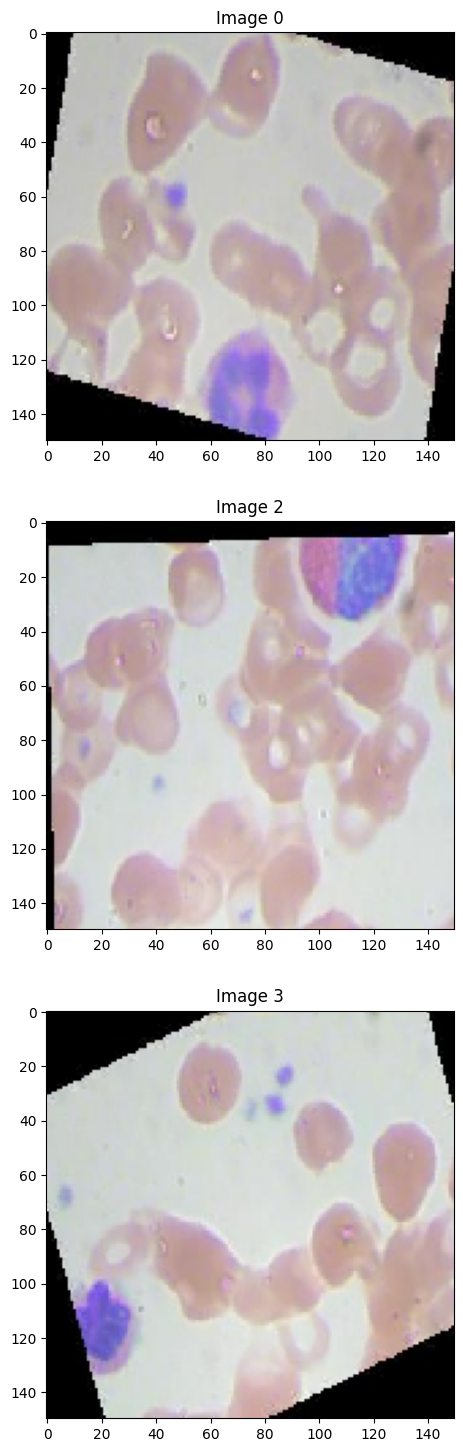

In [17]:
# Seleccionar una imagen para predecir
index = 1
print(f'Label: {np.argmax(test_labels[index])}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

# Visualizar imágenes de prueba
FIRST_IMAGE = 0
SECOND_IMAGE = 2
THIRD_IMAGE = 3

print(f'Label for first image: {np.argmax(test_labels[FIRST_IMAGE])}')
print(f'Label for second image: {np.argmax(test_labels[SECOND_IMAGE])}')
print(f'Label for third image: {np.argmax(test_labels[THIRD_IMAGE])}')

# Mostrar las imágenes
f, axarr = plt.subplots(3, 1, figsize=(6, 18))
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[0].set_title(f'Image {FIRST_IMAGE}')

axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[1].set_title(f'Image {SECOND_IMAGE}')

axarr[2].imshow(test_images[THIRD_IMAGE])
axarr[2].set_title(f'Image {THIRD_IMAGE}')
plt.show()

In [22]:
print(test_labels[:30])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


* Calcular y visualizar matriz de confusión.

78/78 ━━━━━━━━━━━━━━━━━━━━ 54s 689ms/step


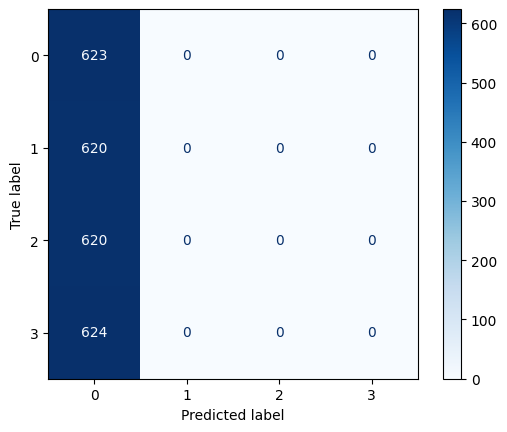

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener las predicciones del modelo
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
true_classes = np.argmax(test_labels, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(true_classes))
disp.plot(cmap=plt.cm.Blues)
plt.show()

* Calcular y visualizar la curva ROC y el AUC.



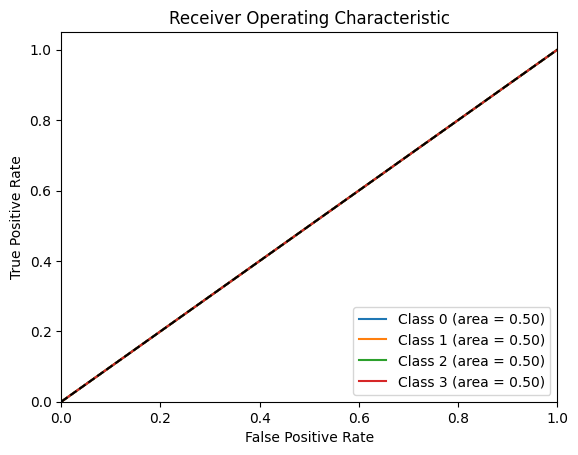

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas verdaderas
n_classes = test_labels.shape[1]
true_classes_binarized = label_binarize(true_classes, classes=np.arange(n_classes))

# Calcular y visualizar la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear todas las curvas ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* Calcular el F1 Score.



In [33]:
from sklearn.metrics import f1_score

# Calcular el F1 Score
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.10036214036462271
